Imports and paths

In [2]:
import numpy as np
import scipy.ndimage as ndimage
from matplotlib import pyplot as plt

DATA_PATH = "data/mona_lisa.jpg"

Interpolation function

In [6]:
def map(image, mapping, interpolation):
    if interpolation == "nn":
        # Nearest neighbor interpolation
        pass
    elif interpolation == "bi":
        x,y = np.int32(np.rint(mapping))
        print(x)
        print(y)
        pass

Reading data

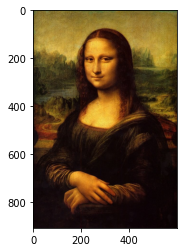

In [11]:
img = plt.imread(DATA_PATH)/255
plt.imshow(img)

Generate picture coordinates used for interpolation

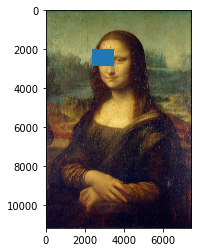

In [5]:
X, Y = np.meshgrid(np.arange(4096), np.arange(4096))
# Scale and move image
X = X*1024/X.shape[0]
Y = Y*800/Y.shape[0]
X += 2416
Y += 2016
points = np.array((Y.reshape(-1), X.reshape(-1)))
plt.figure()
plt.imshow(img)
plt.plot(points[1, :], points[0, :])

Adapt shape for map processing

In [4]:
mapping = np.array([Y, X])
mapping.shape

(2, 4096, 4096)

Show interpolated picture using built-in function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


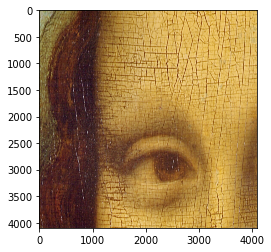

In [5]:
img_tr = np.zeros((X.shape[0], X.shape[1], 3))
img_tr[:, :, 0] = ndimage.interpolation.map_coordinates(img[:, :, 0], mapping)
img_tr[:, :, 1] = ndimage.interpolation.map_coordinates(img[:, :, 1], mapping)
img_tr[:, :, 2] = ndimage.interpolation.map_coordinates(img[:, :, 2], mapping)
plt.figure()
plt.imshow(img_tr)

Interpolate

In [30]:
# Testing area
newX, newY = np.meshgrid(np.arange(1200), np.arange(1500))
oldX = ((img.shape[0]-1) / (newX[0]-1)) * newX
oldY = ((img.shape[1]-1) / (newY[1]-1)) * newY
interpolated = map(img, (1200, 1200), "bi")

1200
1200


/Users/plesasta_pevka/anaconda3/envs/interpolation/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/plesasta_pevka/anaconda3/envs/interpolation/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/plesasta_pevka/anaconda3/envs/interpolation/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


In [6]:
print("Nearest neighbor interpolation")

Nearest neighbor interpolation
